In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from scipy.stats import binned_statistic_2d
# from modest_image import imshow

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


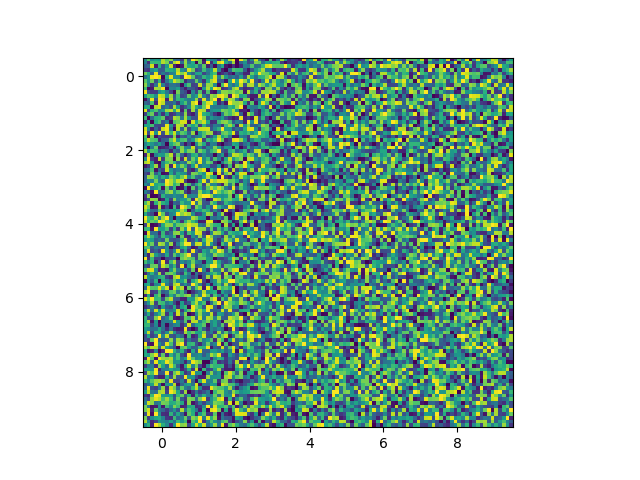

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(np.random.random([10, 10]))

In [5]:
im.set_data(np.random.random([100, 100]))

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


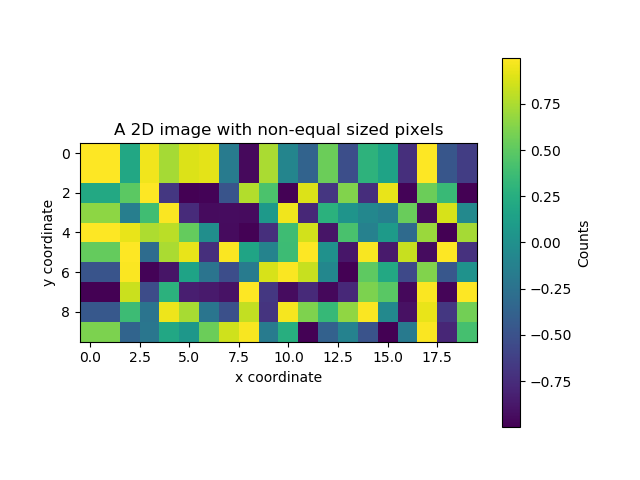

In [5]:
# N = 10
# M = 5

# N = 3000
# M = 2000
# x = np.arange(N, dtype=np.float64)**2
# y = np.arange(M, dtype=np.float64)
# xx, yy = np.meshgrid(x, y)
# b = N/100.0
# c = M/10.0
# r = np.sqrt(((xx-c)/b)**2 + ((yy-c)/b)**2)
# z = np.sin(r)

N = 20
M = 10
x = np.arange(N, dtype=np.float64)**1.1
y = np.arange(M, dtype=np.float64)
xx, yy = np.meshgrid(x, y)
b = N/400.0
c = M/20.0
r = np.sqrt(((xx-c)/b)**2 + ((yy-c)/b)**2)
z = np.sin(r)
# z = r
# x = np.arange(N+1)**2
# y = np.arange(M+1)
# z = np.random.rand(M, N).astype(np.float64)

# x = np.array([[0, 3, 5], [0, 3.5, 4]])
# y = np.array([[0, 3, 5], [0, 3.5, 4]])

fig = plt.figure()
ax = fig.add_subplot(111)
# pcmesh = ax.pcolormesh(x, y, z, cmap="viridis")
pcmesh = ax.imshow(z)
cb = plt.colorbar(pcmesh)
cb.ax.set_ylabel("Counts")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("A 2D image with non-equal sized pixels")
fig.show()

In [6]:
res = 256
nx = res
ny = res
xmin = 0.0
xmax = x[-1]
dx = (xmax - xmin)/float(nx)
xe = np.linspace(xmin, xmax, nx+1)
xc = np.linspace(xmin + 0.5*dx, xmax - 0.5*dx, nx)
ymin = 0.0
ymax = y[-1]
dy = (ymax - ymin)/float(ny)
ye = np.linspace(ymin, ymax, ny+1)
yc = np.linspace(ymin + 0.5*dy, ymax - 0.5*dy, ny)
xg, yg = np.meshgrid(xc, yc)
xg

array([[ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ],
       [ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ],
       [ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ],
       ...,
       [ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ],
       [ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ],
       [ 0.04981487,  0.14944461,  0.24907435, ..., 25.25613902,
        25.35576876, 25.4553985 ]])

In [7]:
results, y_edges, x_edges, bin_number = binned_statistic_2d(
    x=yy.ravel(), y=xx.ravel(), values=[z.ravel()], statistic='mean', bins=[ye, xe])

subs = np.where(np.isfinite(results[0].ravel()))
points = np.transpose([xg.ravel()[subs], yg.ravel()[subs]])
#points = np.transpose([xp.flatten(), yp.flatten()])

In [8]:
print(xx.shape, yy.shape, z.flatten().shape)

(10, 20) (10, 20) (200,)


In [9]:
results[0].shape

(256, 256)

In [10]:
subs

(array([    0,    10,    21,    33,    46,    58,    72,    85,    98,
          112,   126,   140,   154,   168,   182,   197,   211,   226,
          241,   255,  7168,  7178,  7189,  7201,  7214,  7226,  7240,
         7253,  7266,  7280,  7294,  7308,  7322,  7336,  7350,  7365,
         7379,  7394,  7409,  7423, 14336, 14346, 14357, 14369, 14382,
        14394, 14408, 14421, 14434, 14448, 14462, 14476, 14490, 14504,
        14518, 14533, 14547, 14562, 14577, 14591, 21760, 21770, 21781,
        21793, 21806, 21818, 21832, 21845, 21858, 21872, 21886, 21900,
        21914, 21928, 21942, 21957, 21971, 21986, 22001, 22015, 28928,
        28938, 28949, 28961, 28974, 28986, 29000, 29013, 29026, 29040,
        29054, 29068, 29082, 29096, 29110, 29125, 29139, 29154, 29169,
        29183, 36352, 36362, 36373, 36385, 36398, 36410, 36424, 36437,
        36450, 36464, 36478, 36492, 36506, 36520, 36534, 36549, 36563,
        36578, 36593, 36607, 43520, 43530, 43541, 43553, 43566, 43578,
      

In [15]:
grid_z0 = griddata(points, results[0].ravel()[subs], (xg, yg), method='nearest')

In [16]:
points.shape

(200, 2)

In [17]:
z.shape

(10, 20)

<IPython.core.display.Javascript object>


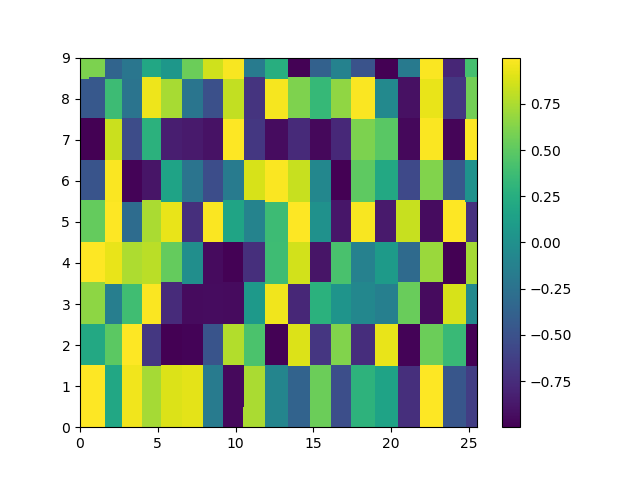

In [18]:
# plt.imshow(grid_z0.T, origin='lower')
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# im = ax1.imshow(results[0], extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto')
im = ax1.imshow(grid_z0, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto')
cb1 = plt.colorbar(im)

# pcmesh = ax.pcolormesh(x, y, z, cmap="viridis")


# cb = plt.colorbar(pcmesh)
# cb.ax.set_ylabel("Counts")
# ax.set_xlabel("x coordinate")
# ax.set_ylabel("y coordinate")
# ax.set_title("A 2D image with non-equal sized pixels")
# fig.show()

In [ ]:
ymax

In [ ]:
xx = xx.ravel()
yy.ravel()

In [ ]:
xx.shape

In [21]:
N = 100
M = 100
L = 100
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
zz = np.arange(L, dtype=np.float64)
x, y, z = np.meshgrid(xx, yy, zz, indexing='ij')
b = N/20.0
c = M/2.0
d = L/2.0
r = np.sqrt(((x-c)/b)**2 + ((y-c)/b)**2 + ((z-d)/b)**2)
a = np.sin(r)

<IPython.core.display.Javascript object>


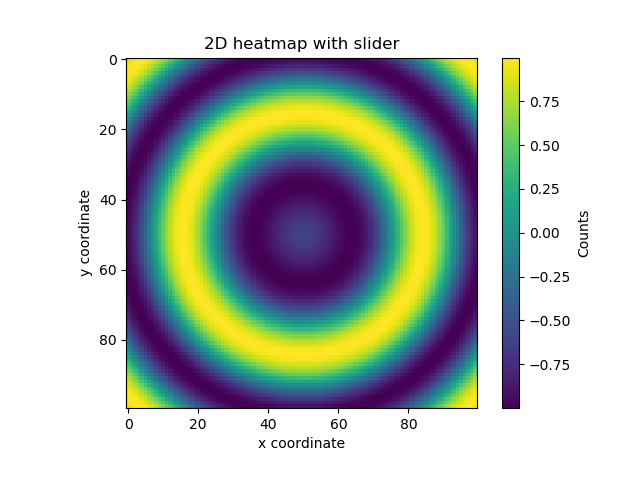

IntSlider(value=0, max=99)

In [22]:
#from matplotlib.widgets import Slider
import ipywidgets as w
 
# data = np.random.rand(10, 10, 10)
idx = 0

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.15)

im_h = ax.imshow(a[:, :, idx], interpolation='nearest')

ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("2D heatmap with slider")
cb = plt.colorbar(im_h)
cb.ax.set_ylabel("Counts")

# ax_depth = plt.axes([0.23, 0.02, 0.56, 0.04])
slider_depth = w.IntSlider(max=a.shape[2]-1,
    value=idx)

def update_depth(change):
#     idx = int(round(slider_depth.val))
    im_h.set_data(a[:, :, change["new"]])

slider_depth.observe(update_depth, names="value")
slider_depth

In [64]:
import pythreejs as p3
import IPython.display as disp
import matplotlib.cm as cm

# N = 50
# M = 40
# L = 30
# xx = np.arange(N, dtype=np.float64)
# yy = np.arange(M, dtype=np.float64)
# zz = np.arange(L, dtype=np.float64)
# x, y, z = np.meshgrid(xx, yy, zz) #, indexing='ij')
# b = N/20.0
# c = M/2.0
# d = L/2.0
# r = np.sqrt(((x-c)/b)**2 + ((y-c)/b)**2 + ((z-d)/b)**2)
# a = np.sin(r)

N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)

geometry = p3.PlaneGeometry(
    width=40,
    height=50)

idx = 0
scal_map = cm.ScalarMappable(cmap="viridis")
data = scal_map.to_rgba(a[:, :].T).astype(np.float32)
texture = p3.DataTexture(
    data=data,
    format="RGBAFormat",
    type="FloatType",
#     width=M, height=N
)

material = p3.MeshBasicMaterial(map=texture)
mesh = p3.Mesh(geometry=geometry, material=material)

width = 800
height= 500
# Create the threejs scene with ambient light and camera
camera = p3.PerspectiveCamera(position=[0, 0, 5],
                                        aspect=width / height)
scene = p3.Scene(children=[mesh, camera])
controller = p3.OrbitControls(controlling=camera)
# Render the scene into a widget
renderer = p3.Renderer(camera=camera, scene=scene,
                                 controls=[controller],
                                 width=width,
                                 height=height)


# sl = w.IntSlider(max=a.shape[2]-1,
#     value=idx)

# def update_slice(change):
#     texture.data = scal_map.to_rgba(a[:, :, change["new"]]).astype(np.float32)

# sl.observe(update_slice, names="value")
# # slider_depth


# # sl = widgets.IntSlider(
# #                 value=0,
# #                 min=0,
# #                 max=N-1,
# #                 step=1,
# #                 continuous_update=True,
# #                 readout=True)
# # def update_y(change):
# # #     for i, line in enumerate(ax.lines):
# # #         line.set_ydata(a[i][:, change["new"]])
# #     pts1[:, 1] = a[0][:, change["new"]]
# #     geometry1.attributes["position"].array = pts1
# #     pts2[:, 1] = a[1][:, change["new"]]
# #     geometry2.attributes["position"].array = pts2
# # sl.observe(update_y, names="value")
# disp.display(sl)
renderer


Renderer(camera=PerspectiveCamera(aspect=1.6, position=(0.0, 0.0, 5.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale…

In [53]:
N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)

In [56]:
# N = 50
# M = 40
# L = 30
# xx = np.arange(N, dtype=np.float64)
# yy = np.arange(M, dtype=np.float64)
# zz = np.arange(L, dtype=np.float64)
# x, y, z = np.meshgrid(xx, yy, zz)#, indexing='ij')
# # z, y, x = np.meshgrid(zz, yy, xx)#, indexing='ij')
# b = N/20.0
# c = M/2.0
# d = L/2.0
# r = np.sqrt(((x-c)/b)**2 + ((y-c)/b)**2 + ((z-d)/b)**2)
# a = np.sin(r)

idx = 0
scal_map = cm.ScalarMappable(cmap="viridis")
data = scal_map.to_rgba(a.T).astype(np.float32)
texture = p3.DataTexture(
    data=data,
    format="RGBAFormat",
    type="FloatType"
)
texture

Preview(child=DataTexture(data=array([[[0.273809, 0.031497, 0.358853, 1.      ],
        [0.273809, 0.031497, …

In [43]:
data

array([[[0.150148, 0.676631, 0.506589, 1.      ],
        [0.128729, 0.563265, 0.551229, 1.      ],
        [0.171176, 0.45253 , 0.557965, 1.      ],
        ...,
        [0.220057, 0.343307, 0.549413, 1.      ],
        [0.171176, 0.45253 , 0.557965, 1.      ],
        [0.128729, 0.563265, 0.551229, 1.      ]],

       [[0.128729, 0.563265, 0.551229, 1.      ],
        [0.174274, 0.445044, 0.557792, 1.      ],
        [0.225863, 0.330805, 0.547314, 1.      ],
        ...,
        [0.267968, 0.223549, 0.512008, 1.      ],
        [0.225863, 0.330805, 0.547314, 1.      ],
        [0.174274, 0.445044, 0.557792, 1.      ]],

       [[0.171176, 0.45253 , 0.557965, 1.      ],
        [0.225863, 0.330805, 0.547314, 1.      ],
        [0.270595, 0.214069, 0.507052, 1.      ],
        ...,
        [0.283229, 0.120777, 0.440584, 1.      ],
        [0.270595, 0.214069, 0.507052, 1.      ],
        [0.225863, 0.330805, 0.547314, 1.      ]],

       ...,

       [[0.783315, 0.879285, 0.125405, 1. 

In [36]:
arr_w = 256
arr_h = 256

def gen_checkers(width, height, n_checkers_x, n_checkers_y):
    array = np.ones((width, height, 3), dtype='float32')

    # width in texels of each checker
    checker_w = width / n_checkers_x
    checker_h = height / n_checkers_y


    for y in range(arr_h):
        for x in range(arr_w):
            color_key = int(x / checker_w) + int(y / checker_h)
            if color_key % 2 == 0:
                array[x, y, :] = [ 0, 0, 0 ]
            else:
                array[x, y, :] = [ 1, 1, 1 ]
    return array


data_tex = p3.DataTexture(
    data=gen_checkers(arr_w, arr_h, 12, 12),
    format="RGBFormat",
    type="FloatType",
)
data_tex

Preview(child=DataTexture(data=array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
…

In [39]:
gen_checkers(arr_w, arr_h, 12, 12)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)